In [1]:
import pandas as pd

# Question 1
# 1_a

Flower = pd.read_csv('Flower.csv')
display(Flower.head())

,X1,X2,Class
0,1.204442,3.576114,0
1,0.158710,-1.482171,0
2,0.095247,-1.279955,0
3,0.349178,-2.064380,0
4,0.694150,2.889109,0


In [2]:
Flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      400 non-null    float64
 1   X2      400 non-null    float64
 2   Class   400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [3]:
# 1_b

# find the number of null values and missing values in each column
for col in Flower.columns:
    if Flower[col].dtype == 'float64':
        x = pd.to_numeric(Flower[col], errors='coerce')
        idx = x.isna()
        seen = set()
        uniq = [x for x in Flower[idx][col] if x not in seen and not seen.add(x)]
        for j in Flower[idx][col]:
            Flower[col] = Flower[col].replace({j : np.NaN})
        
display(Flower.isna().sum())

X1       0
X2       0
Class    0
dtype: int64

X1 	 ( min =  -4.211898112302497  max =  4.078165875644617 )

X2 	 ( min =  -4.035124003739587  max =  4.037643470481511 )

Class 	 ( min =  0  max =  1 )



<AxesSubplot:>

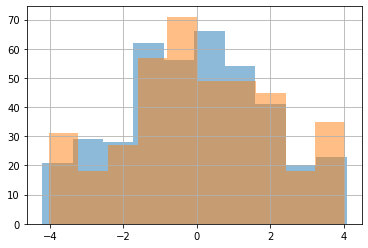

In [4]:
for col in Flower.columns:
    print ( col, '\t ( min = ', Flower[col].min(), ' max = ', Flower[col].max(), ')\n')

Flower['X1'].hist(alpha = 0.5)
Flower['X2'].hist(alpha = 0.5)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Flower)
Flower_std = pd.DataFrame(scaler.transform(Flower) , columns = ['X1', 'X2', 'Class'])
Flower_std['Class'] = Flower['Class']

display(Flower_std.head())

,X1,X2,Class
0,0.634205,1.750630,0
1,0.102697,-0.773978,0
2,0.070442,-0.673052,0
3,0.199506,-1.064561,0
4,0.374842,1.407743,0


X1 	 ( min =  -2.11872062930916  max =  2.094811727652321 )

X2 	 ( min =  -2.0481666654602075  max =  1.980981188795628 )

Class 	 ( min =  0  max =  1 )



<AxesSubplot:>

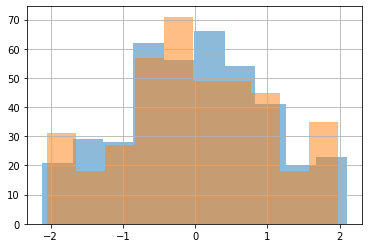

In [6]:
for col in Flower_std.columns:
    print ( col, '\t ( min = ', Flower_std[col].min(), ' max = ', Flower_std[col].max(), ')\n')

Flower_std['X1'].hist(alpha = 0.5)
Flower_std['X2'].hist(alpha = 0.5)

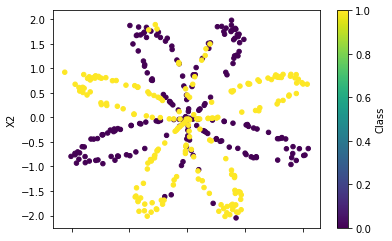

In [34]:
# 1_c

import matplotlib.pyplot as plt
ax1 = Flower_std.plot.scatter(x='X1', y='X2', c='Class', colormap='viridis')

In [8]:
# 1_d

x = Flower_std[['X1', 'X2']]
y = Flower_std[['Class']]
display(x.head())
display(y.head())

,X1,X2
0,0.634205,1.750630
1,0.102697,-0.773978
2,0.070442,-0.673052
3,0.199506,-1.064561
4,0.374842,1.407743


,Class
0,0
1,0
2,0
3,0
4,0


In [9]:
# 1_e

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [10]:
display(y_train['Class'].value_counts())
s = y_train['Class'].value_counts().sum()
print( '===========> train <===========' )
print( 'Distribution Of 0 :' , round(y_train['Class'].value_counts()[0] * 100 / s, 2), '%')
print( 'Distribution Of 1 :' , round(y_train['Class'].value_counts()[1] * 100 / s, 2), '%')


0    163
1    157
Name: Class, dtype: int64

===========> train <===========
Distribution Of 0 : 50.94 %
Distribution Of 1 : 49.06 %


In [36]:
display(y_test['Class'].value_counts())
s = y_test['Class'].value_counts().sum()
print( '============> test <============' )
print( 'Distribution Of 0 :' , round(y_test['Class'].value_counts()[0] * 100 / s, 2), '%')
print( 'Distribution Of 1 :' , round(y_test['Class'].value_counts()[1] * 100 / s, 2), '%')


1    43
0    37
Name: Class, dtype: int64

============> test <============
Distribution Of 0 : 46.25 %
Distribution Of 1 : 53.75 %


In [12]:
# 1_f

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000, verbose=False)
mlp.fit(x_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)

In [13]:
# 1_g

from sklearn.metrics import accuracy_score
y_predict = mlp.predict(x_test)
print(accuracy_score(y_test,y_predict))

0.8875


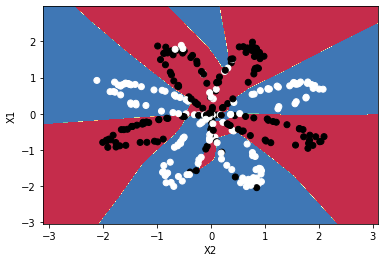

In [14]:
# 1_h

import numpy as np
def plot_prediction(model, X, y):
    x_min, x_max = X.T.iloc[0, :].min() - 1, X.T.iloc[0, :].max() + 1
    y_min, y_max = X.T.iloc[1, :].min() - 1, X.T.iloc[1, :].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('X1')
    plt.xlabel('X2')
    co = np.array(y.iloc[:]).ravel()
    colors = np.array(["black", "white"])
    plt.scatter(X.T.iloc[0, :], X.T.iloc[1, :], c=colors[co], cmap=plt.cm.Spectral)

plot_prediction(lambda x: mlp.predict(x), x_train, y_train)


In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#1_i
for i in range(20, 50, 5):
    mlp = MLPClassifier(hidden_layer_sizes=(i, i, i), max_iter=1000)
    mlp.fit(x_train, y_train.values.ravel())
    y_predict = mlp.predict(x_test)
    print('accuracy_score for hidden layer ', i, '=' , accuracy_score(y_test,y_predict))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score for hidden layer  20 = 0.9
accuracy_score for hidden layer  25 = 0.8875
accuracy_score for hidden layer  30 = 0.9125
accuracy_score for hidden layer  35 = 0.8875
accuracy_score for hidden layer  40 = 0.925
accuracy_score for hidden layer  45 = 0.875


In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

for i in range(1000, 2000, 100):
    mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=i)
    mlp.fit(x_train, y_train.values.ravel())
    y_predict = mlp.predict(x_test)
    print('accuracy_score for max_iter', i, '=' , accuracy_score(y_test,y_predict))

accuracy_score for max_iter 1000 = 0.875
accuracy_score for max_iter 1100 = 0.9
accuracy_score for max_iter 1200 = 0.9
accuracy_score for max_iter 1300 = 0.8875
accuracy_score for max_iter 1400 = 0.9125
accuracy_score for max_iter 1500 = 0.9
accuracy_score for max_iter 1600 = 0.8875
accuracy_score for max_iter 1700 = 0.8875
accuracy_score for max_iter 1800 = 0.8875
accuracy_score for max_iter 1900 = 0.8875


In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

activation_f = ['identity', 'logistic', 'tanh', 'relu']

for i in activation_f:
    mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000, activation = i)
    mlp.fit(x_train, y_train.values.ravel())
    y_predict = mlp.predict(x_test)
    print('accuracy_score for activation function', i, '=' , accuracy_score(y_test,y_predict))

accuracy_score for activation function identity = 0.4375
accuracy_score for activation function logistic = 0.4625
accuracy_score for activation function tanh = 0.9
accuracy_score for activation function relu = 0.9


In [46]:
mlp = MLPClassifier(hidden_layer_sizes=(40, 40, 40), max_iter=1400, activation = 'tanh')
mlp.fit(x_train, y_train.values.ravel())
y_predict = mlp.predict(x_test)
print('Approximatly the best accuracy_score = ' , accuracy_score(y_test,y_predict))

Approximatly the best accuracy_score =  0.9125
